In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def get_obs(N=2000, pos_ratio=0.5, th=0.5):
    N_pos = int(N * pos_ratio)
    N_neg = N - N_pos
    y_true = [1] * N_pos + [0] * N_neg
    y_true = np.array(y_true)
    y_hat = np.random.rand(N) > th
    return y_true, y_hat
y_true, y_hat = get_obs()

In [19]:
def recall(label, pred):
    TP = np.where(label == 1, label == pred, False).sum()
    return TP / (label == 1).sum()

In [21]:
def precision(label, pred):
    TP = np.where(label == 1, label == pred, False).sum()
    return TP / (pred == 1).sum()

In [66]:
def mean_p_r(p, r):
    return 0.5 * (p + r)

def min_p_r(p, r):
    if isinstance(p, np.ndarray) and isinstance(r, np.ndarray):
        return np.min(np.stack([p, r]), axis=0)
    else:
        return min(p, r)
def f_score(p, r):
    return 2 * p * r / (p + r)

In [52]:
def draw_contour(x, y, z, levels, xname, yname):
    plt.contour(x, y, z, levels=levels)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.show()

In [70]:
N = 100
levels = 30
p = np.linspace(0, 1, N)
r = np.linspace(0, 1, N)
p, r = np.meshgrid(p, r)
vals = {
    'mean': mean_p_r(p, r),
    'min': min_p_r(p, r),
    'f': f_score(p, r)
}

C:\Users\Alex\anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


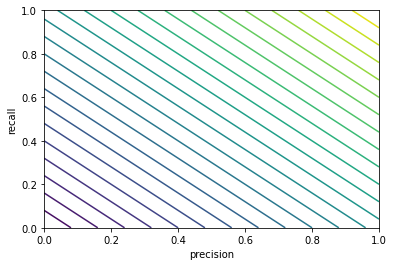

In [71]:
draw_contour(p, r, vals['mean'], levels, 'precision', 'recall')

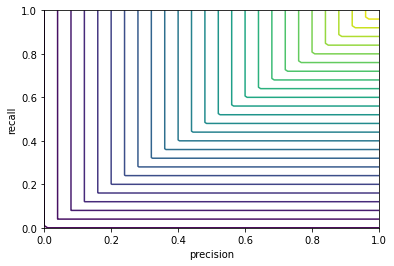

In [72]:
draw_contour(p, r, vals['min'], levels, 'precision', 'recall')

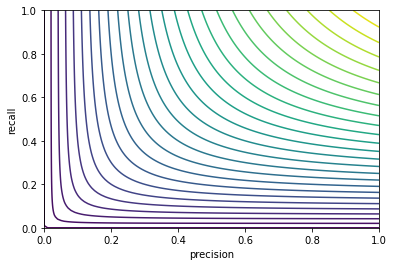

In [73]:
draw_contour(p, r, vals['f'], levels, 'precision', 'recall')

In [78]:
X = np.random.rand(10, 3)
y = np.random.rand(10) > 0.5

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [81]:
lr.predict_proba(X)

array([[0.60674084, 0.39325916],
       [0.61285153, 0.38714847],
       [0.61640926, 0.38359074],
       [0.60105117, 0.39894883],
       [0.6225193 , 0.3774807 ],
       [0.57410807, 0.42589193],
       [0.59571105, 0.40428895],
       [0.57162081, 0.42837919],
       [0.60370365, 0.39629635],
       [0.59530994, 0.40469006]])